In [2]:
import numpy as np
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Tuple
# plt.style.use('bmh')
OUTPUTS_DIR = "./outputs/"
DATA_PATH = OUTPUTS_DIR + 'Performance_Uniform.csv'
df = pd.read_csv(DATA_PATH)

In [3]:
def convert_position(x : int) -> Tuple[int, int]:
    if x == 0:
        return (0,0)
    elif x == 1:
        return (0,1)
    else:
        return (x//2, x%2)

def pyplot_backend_change(extension : str) -> Tuple[str, int]:
    if extension == 'pgf':
        save_path = 'C:/Users/rosal/Documents/Files/Master Project/Report/'
        fig_size = 5
        matplotlib.use("pgf")
        matplotlib.rcParams.update({
            "pgf.texsystem": "pdflatex",
            'font.family': 'serif',
            'text.usetex': True,
            'pgf.rcfonts': False,
        })
    else:
        save_path = './images/'
        fig_size = 8
        matplotlib.use("module://matplotlib_inline.backend_inline")
        matplotlib.rcParams.update({
            "pgf.texsystem": "xelatex",
            'font.family': 'sans-serif',
            'text.usetex': False,
            'pgf.rcfonts': True,
        })
    return save_path, fig_size

Matploblib backend: module://matplotlib_inline.backend_inline


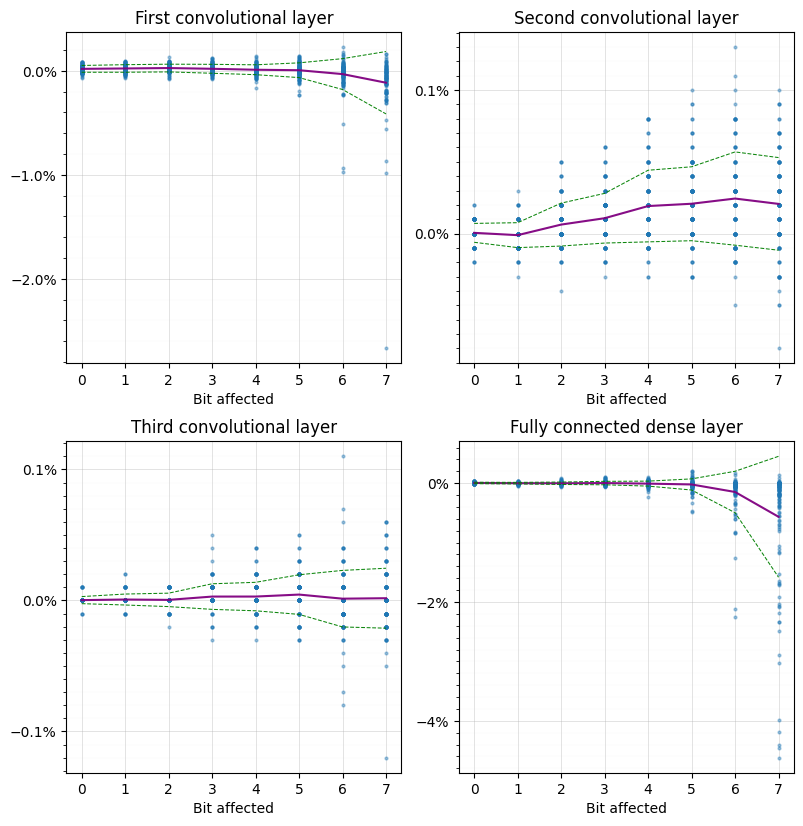

In [5]:
# Accuracy degradation for the Q Aware model
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())
SAVE_NAME = 'Q_Aware_acc_degradation.' + EXTENSION

# Figure dpi = 100.0 default dots per inch, figsize is in inches
ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (fig_size, fig_size))
fig.tight_layout(h_pad = 3.5, rect = [0, 0, 1, 1]) # w_pad for horizontal padding
# fig.suptitle('Q Aware model accuraccy degradation with 1 bit affected')
titles = ['First convolutional layer', 'Second convolutional layer', 'Third convolutional layer', 'Fully connected dense layer']
yaxis_major_locators = [1, .1, .1, 2]
yaxis_minors_locators = [5, 10, 10, 10]
decimals = [1, 1, 1, 0]

for i in range(1, 4 + 1):
    ax[convert_position(i - 1)].yaxis.set_major_formatter(ticker.PercentFormatter(decimals = decimals[i - 1]))
    condition = df['kernel_index'] == i - 1
    ax[convert_position(i - 1)].plot(df.loc[condition]['bit_disrupted'], df.loc[condition]['q_aware_acc_degradation']*100, '.', alpha = 0.4, markersize = 4)
    ax[convert_position(i - 1)].set_title(titles[i - 1])
    ax[convert_position(i - 1)].set_xlabel('Bit affected')
    ax[convert_position(i - 1)].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[convert_position(i - 1)].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i - 1]))
    ax[convert_position(i - 1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minors_locators[i - 1])) 
    ax[convert_position(i - 1)].grid()
    ax[convert_position(i - 1)].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.50)
    ax[convert_position(i - 1)].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
    
    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition]['bit_disrupted'])
    for j in bits_array:
        new_condition = condition & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_acc_degradation']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_acc_degradation']).std())
    averages = np.array(averages)
    ax[convert_position(i - 1)].plot(bits_array, averages*100, alpha = 0.95, color = 'purple', linewidth = 1.5)
    ax[convert_position(i - 1)].plot(bits_array, (averages + stds)*100, '--', alpha = 0.95, color = 'green', linewidth = 0.75)
    ax[convert_position(i - 1)].plot(bits_array, (averages - stds)*100, '--', alpha = 0.95, color = 'green', linewidth = 0.75)

plt.savefig(save_path + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

In [9]:
# Loss for the Q Aware model
EXTENSION = 'pgf'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())
SAVE_NAME = 'Q_Aware_loss.' + EXTENSION

# Figure dpi = 100.0 default dots per inch, figsize is in inches
ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (fig_size, fig_size))
fig.tight_layout(h_pad = 3.5, rect = [0, 0, 1, 1]) # w_pad for horizontal padding
# fig.suptitle('Q Aware model loss with 1 bit affected')
titles = ['First convolutional layer', 'Second convolutional layer', 'Third convolutional layer', 'Fully connected dense layer']
yaxis_major_locators = [.1, .001 , .001 , .1]
yaxis_minors_locators = [5, 5, 5, 5]
decimals = [1, 1, 1, 0]

for i in range(1, 4 + 1):
    condition = df['kernel_index'] == i - 1
    ax[convert_position(i - 1)].plot(df.loc[condition]['bit_disrupted'], df.loc[condition]['q_aware_loss'], '.', alpha = 0.4, markersize = 4)
    ax[convert_position(i - 1)].set_title(titles[i - 1])
    ax[convert_position(i - 1)].set_xlabel('Bit affected')
    ax[convert_position(i - 1)].xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax[convert_position(i - 1)].yaxis.set_major_locator(ticker.MultipleLocator(yaxis_major_locators[i - 1]))
    ax[convert_position(i - 1)].yaxis.set_minor_locator(ticker.AutoMinorLocator(yaxis_minors_locators[i - 1])) 
    ax[convert_position(i - 1)].grid()
    ax[convert_position(i - 1)].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.5)
    ax[convert_position(i - 1)].grid(which = 'minor', linestyle = ':', alpha = 0.25, linewidth = 0.25)
    
    # Trend lines
    averages = []
    stds = []
    bits_array = np.unique(df.loc[condition]['bit_disrupted'])
    for j in bits_array:
        new_condition = condition & (df['bit_disrupted'] == j)
        averages.append(pd.to_numeric(df.loc[new_condition]['q_aware_loss']).mean())
        stds.append(pd.to_numeric(df.loc[new_condition]['q_aware_loss']).std())
    averages = np.array(averages)
    ax[convert_position(i - 1)].plot(bits_array, averages, alpha = 0.95, color = 'purple', linewidth = 1.5)
    ax[convert_position(i - 1)].plot(bits_array, (averages + stds), '--', alpha = 0.95, color = 'green', linewidth = 0.75)
    ax[convert_position(i - 1)].plot(bits_array, (averages - stds), '--', alpha = 0.95, color = 'green', linewidth = 0.75)

plt.savefig(save_path + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

Matploblib backend: pgf


C:\Users\rosal\AppData\Local\Temp\ipykernel_45540\909585622.py:43: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


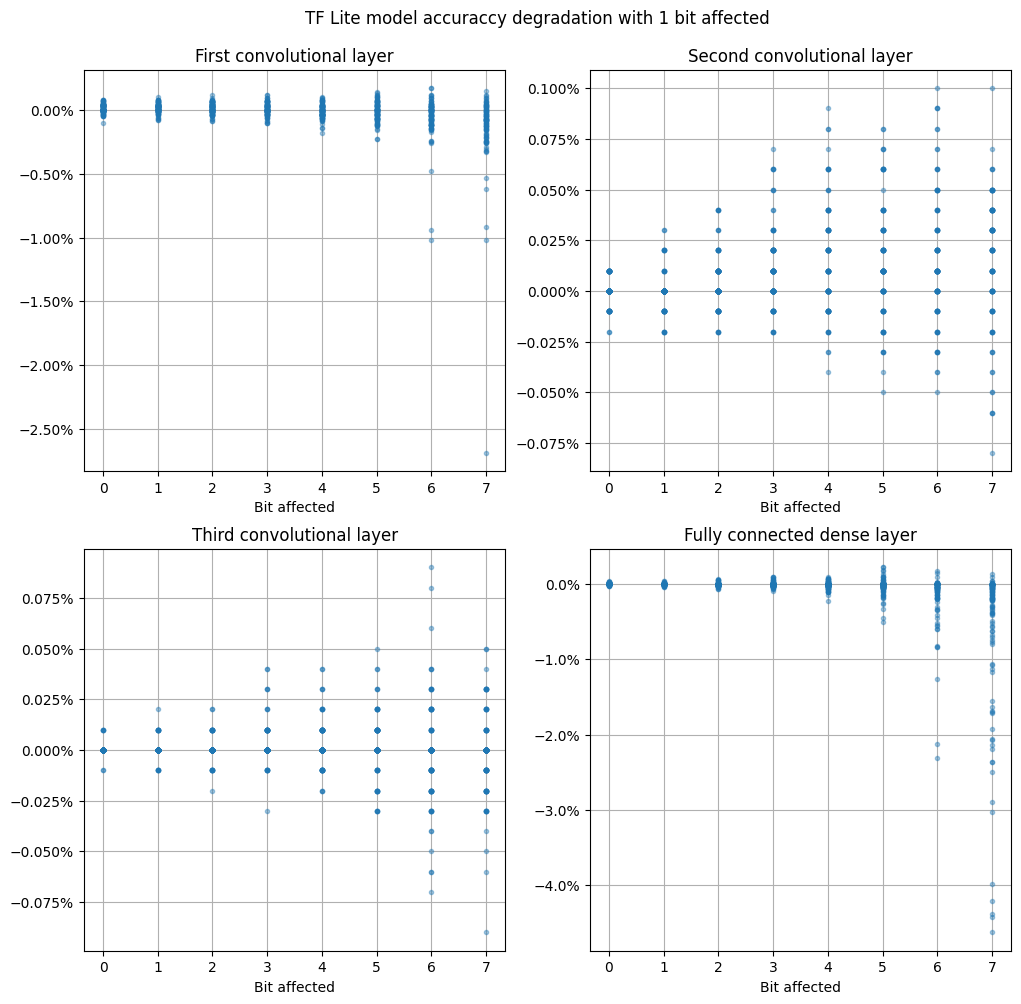

In [5]:
# Accuracy degradation for TFLite model
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
SAVE_NAME = 'TFLite_acc_degradation.' + EXTENSION

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (fig_size, fig_size))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('TF Lite model accuraccy degradation with 1 bit affected')
titles = ['First convolutional layer', 'Second convolutional layer', 'Third convolutional layer', 'Fully connected dense layer']

for i in range(1, 4 + 1):
    ax[convert_position(i - 1)].yaxis.set_major_formatter(ticker.PercentFormatter())
    ax[convert_position(i - 1)].plot(df.loc[df['kernel_index'] == i - 1]['bit_disrupted'], df.loc[df['kernel_index'] == i - 1]['tflite_acc_degradation']*100, '.', alpha = 0.4)
    ax[convert_position(i - 1)].set_title(titles[i - 1])
    ax[convert_position(i - 1)].set_xlabel('Bit affected')
    ax[convert_position(i - 1)].grid()

plt.savefig(save_path + 'TFlite_acc_degradation.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# Dispersion? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Q Aware model accuraccy degradation dispersion with 1 bit affected')

ax[0,0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[0,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 0]['bit_disrupted'])), df.loc[df['kernel_index'] == 0]['q_aware_acc_degradation']*100, '.', alpha = 0.2)
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Simulation number')
ax[0,0].grid()

ax[0,1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[0,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 1]['bit_disrupted'])), df.loc[df['kernel_index'] == 1]['q_aware_acc_degradation']*100, '.', alpha = 0.2)
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Simulation number')
ax[0,1].grid()

ax[1,0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 2]['bit_disrupted'])), df.loc[df['kernel_index'] == 2]['q_aware_acc_degradation']*100, '.', alpha = 0.2)
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Simulation number')
ax[1,0].grid()

ax[1,1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 3]['bit_disrupted'])), df.loc[df['kernel_index'] == 3]['q_aware_acc_degradation']*100, '.', alpha = 0.2)
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Simulation number')
ax[1,1].grid()
plt.savefig(save_path + 'Q_Aware_acc_degradation_2.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# TFLite accuracy degradation? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('TF Lite model accuraccy degradation dispersion with 1 bit affected')

ax[0,0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[0,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 0]['bit_disrupted'])), df.loc[df['kernel_index'] == 0]['tflite_acc_degradation']*100, '.', alpha = 0.2)
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Simulation number')
ax[0,0].grid()

ax[0,1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[0,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 1]['bit_disrupted'])), df.loc[df['kernel_index'] == 1]['tflite_acc_degradation']*100, '.', alpha = 0.2)
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Simulation number')
ax[0,1].grid()

ax[1,0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 2]['bit_disrupted'])), df.loc[df['kernel_index'] == 2]['tflite_acc_degradation']*100, '.', alpha = 0.2)
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Simulation number')
ax[1,0].grid()

ax[1,1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 3]['bit_disrupted'])), df.loc[df['kernel_index'] == 3]['tflite_acc_degradation']*100, '.', alpha = 0.2)
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Simulation number')
ax[1,1].grid()
plt.savefig(save_path + 'TFlite_acc_degradation_2.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# TFLite loss? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Q Aware and TFLite loss with 1 bit affected')

# ax[0,0].plot(df.loc[df['kernel_index'] == 0]['bit_disrupted'], df.loc[df['kernel_index'] == 0]['q_aware_loss'], '.', alpha = 0.1)
ax[0,0].plot(df.loc[df['kernel_index'] == 0]['bit_disrupted'], df.loc[df['kernel_index'] == 0]['tflite_loss'], '.', color = 'r', alpha = 0.2)
ax[0,0].legend(['q aware model', 'tflite model'])
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Bit affected')
ax[0,0].grid()

# ax[0,1].plot(df.loc[df['kernel_index'] == 1]['bit_disrupted'], df.loc[df['kernel_index'] == 1]['q_aware_loss'], '.', alpha = 0.1)
ax[0,1].plot(df.loc[df['kernel_index'] == 1]['bit_disrupted'], df.loc[df['kernel_index'] == 1]['tflite_loss'], '.', color = 'r', alpha = 0.2)
ax[0,1].legend(['q aware model', 'tflite model'])
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Bit affected')
ax[0,1].grid()

# ax[1,0].plot(df.loc[df['kernel_index'] == 2]['bit_disrupted'], df.loc[df['kernel_index'] == 2]['q_aware_loss'], '.', alpha = 0.1)
ax[1,0].plot(df.loc[df['kernel_index'] == 2]['bit_disrupted'], df.loc[df['kernel_index'] == 2]['tflite_loss'], '.', color = 'r', alpha = 0.2)
ax[1,0].legend(['q aware model', 'tflite model'])
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Bit affected')
ax[1,0].grid()

# ax[1,1].plot(df.loc[df['kernel_index'] == 2]['bit_disrupted'], df.loc[df['kernel_index'] == 3]['q_aware_loss'], '.', alpha = 0.1)
ax[1,1].plot(df.loc[df['kernel_index'] == 2]['bit_disrupted'], df.loc[df['kernel_index'] == 3]['tflite_loss'], '.', color = 'r', alpha = 0.2)
ax[1,1].legend(['q aware model', 'tflite model'])
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Bit affected')
ax[1,1].grid()
plt.savefig(save_path + 'Losses grouped.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# Laplacian? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Float point laplacian difference between original and modified with 1 bit affected')

ax[0,0].plot(df.loc[df['kernel_index'] == 0]['bit_disrupted'], df.loc[df['kernel_index'] == 0]['abs_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Bit affected')
ax[0,0].grid()

ax[0,1].plot(df.loc[df['kernel_index'] == 1]['bit_disrupted'], df.loc[df['kernel_index'] == 1]['abs_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Bit affected')
ax[0,1].grid()

ax[1,0].plot(df.loc[df['kernel_index'] == 2]['bit_disrupted'], df.loc[df['kernel_index'] == 2]['abs_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Bit affected')
ax[1,0].grid()

ax[1,1].plot(df.loc[df['kernel_index'] == 3]['bit_disrupted'], df.loc[df['kernel_index'] == 3]['abs_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Bit affected')
ax[1,1].grid()
plt.savefig(save_path + 'Original laplacian difference.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# Modified laplacian? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Original laplacian vs modified laplacian with 1 bit affected')

ax[0,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 0]['bit_disrupted'])), df.loc[df['kernel_index'] == 0]['original_laplacian'], '.', alpha = 0.2)
ax[0,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 0]['bit_disrupted'])), df.loc[df['kernel_index'] == 0]['modified_laplacian'], '.', color = 'r', alpha = 0.2)
ax[0,0].legend(['original', 'disrupted'])
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Simulation number')
ax[0,0].grid()

ax[0,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 1]['bit_disrupted'])), df.loc[df['kernel_index'] == 1]['original_laplacian'], '.', alpha = 0.2)
ax[0,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 1]['bit_disrupted'])), df.loc[df['kernel_index'] == 1]['modified_laplacian'], '.', color = 'r', alpha = 0.2)
ax[0,1].legend(['original', 'disrupted'])
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Simulation number')
ax[0,1].grid()

ax[1,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 2]['bit_disrupted'])), df.loc[df['kernel_index'] == 2]['original_laplacian'], '.', alpha = 0.2)
ax[1,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 2]['bit_disrupted'])), df.loc[df['kernel_index'] == 2]['modified_laplacian'], '.', color = 'r', alpha = 0.2)
ax[1,0].legend(['original', 'disrupted'])
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Simulation number')
ax[1,0].grid()

ax[1,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 3]['bit_disrupted'])), df.loc[df['kernel_index'] == 3]['original_laplacian'], '.', alpha = 0.2)
ax[1,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 3]['bit_disrupted'])), df.loc[df['kernel_index'] == 3]['modified_laplacian'], '.', color = 'r', alpha = 0.2)
ax[1,1].legend(['original', 'disrupted'])
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Simulation number')
ax[1,1].grid()
plt.savefig(save_path + 'Original laplacian variation.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# Absolute integer laplacian? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Integer laplacian difference between original and modified with 1 bit affected')

ax[0,0].plot(df.loc[df['kernel_index'] == 0]['bit_disrupted'], df.loc[df['kernel_index'] == 0]['abs_int_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Bit affected')
ax[0,0].grid()

ax[0,1].plot(df.loc[df['kernel_index'] == 1]['bit_disrupted'], df.loc[df['kernel_index'] == 1]['abs_int_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Bit affected')
ax[0,1].grid()

ax[1,0].plot(df.loc[df['kernel_index'] == 2]['bit_disrupted'], df.loc[df['kernel_index'] == 2]['abs_int_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Bit affected')
ax[1,0].grid()

ax[1,1].plot(df.loc[df['kernel_index'] == 3]['bit_disrupted'], df.loc[df['kernel_index'] == 3]['abs_int_laplacian_diff'], '.', color = 'r', alpha = 0.2)
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Bit affected')
ax[1,1].grid()
plt.savefig(save_path + 'Absolute integer laplacian difference.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# Laplacian again? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Original integer laplacian vs modified integer laplacian with 1 bit affected')

ax[0,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 0]['bit_disrupted'])), df.loc[df['kernel_index'] == 0]['original_int_laplacian'], '.', alpha = 0.2)
ax[0,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 0]['bit_disrupted'])), df.loc[df['kernel_index'] == 0]['modified_int_laplacian'], '.', color = 'r', alpha = 0.2)
ax[0,0].legend(['original', 'disrupted'])
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Simulation number')
ax[0,0].grid()

ax[0,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 1]['bit_disrupted'])), df.loc[df['kernel_index'] == 1]['original_int_laplacian'], '.', alpha = 0.2)
ax[0,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 1]['bit_disrupted'])), df.loc[df['kernel_index'] == 1]['modified_int_laplacian'], '.', color = 'r', alpha = 0.2)
ax[0,1].legend(['original', 'disrupted'])
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Simulation number')
ax[0,1].grid()

ax[1,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 2]['bit_disrupted'])), df.loc[df['kernel_index'] == 2]['original_int_laplacian'], '.', alpha = 0.2)
ax[1,0].plot(np.arange(0,len(df.loc[df['kernel_index'] == 2]['bit_disrupted'])), df.loc[df['kernel_index'] == 2]['modified_int_laplacian'], '.', color = 'r', alpha = 0.2)
ax[1,0].legend(['original', 'disrupted'])
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Simulation number')
ax[1,0].grid()

ax[1,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 3]['bit_disrupted'])), df.loc[df['kernel_index'] == 3]['original_int_laplacian'], '.', alpha = 0.2)
ax[1,1].plot(np.arange(0,len(df.loc[df['kernel_index'] == 3]['bit_disrupted'])), df.loc[df['kernel_index'] == 3]['modified_int_laplacian'], '.', color = 'r', alpha = 0.2)
ax[1,1].legend(['original', 'disrupted'])
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Simulation number')
ax[1,1].grid()
plt.savefig(save_path + 'Absolute integer laplacian variation.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# TFLite accuracy degradation again? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
fig, ax = plt.subplots(2, 2, figsize = (10, 10))
fig.tight_layout(h_pad = 3.5, w_pad = 3.0, rect=[0, 0, 1, 0.94])
fig.suptitle('Absolute integer laplacian difference vs TF Lite accuracy degradation with 1 bit affected')

ax[0,0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[0,0].plot(df.loc[df['kernel_index'] == 0]['abs_int_laplacian_diff'], df.loc[df['kernel_index'] == 0]['tflite_acc_degradation']*100, '.', color = 'r', alpha = 0.2)
ax[0,0].set_title('First convolutional layer')
ax[0,0].set_xlabel('Absolute integer laplacian difference')
ax[0,0].grid()

ax[0,1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[0,1].plot(df.loc[df['kernel_index'] == 1]['abs_int_laplacian_diff'], df.loc[df['kernel_index'] == 1]['tflite_acc_degradation']*100, '.', color = 'r', alpha = 0.2)
ax[0,1].set_title('Second convolutional layer')
ax[0,1].set_xlabel('Absolute integer laplacian difference')
ax[0,1].grid()

ax[1,0].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,0].plot(df.loc[df['kernel_index'] == 2]['abs_int_laplacian_diff'], df.loc[df['kernel_index'] == 2]['tflite_acc_degradation']*100, '.', color = 'r', alpha = 0.2)
ax[1,0].set_title('Third convolutional layer')
ax[1,0].set_xlabel('Absolute integer laplacian difference')
ax[1,0].grid()

ax[1,1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1,1].plot(df.loc[df['kernel_index'] == 3]['abs_int_laplacian_diff'], df.loc[df['kernel_index'] == 3]['tflite_acc_degradation']*100, '.', color = 'r', alpha = 0.2)
ax[1,1].set_title('Fully connected dense layer')
ax[1,1].set_xlabel('Absolute integer laplacian difference')
ax[1,1].grid()
plt.savefig(save_path + 'Absolute integer laplacian diff vs TF Lite acc degradation.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# Quantized model accuracy degradation histogram? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
N_BITS = 8
N_LAYERS = 4
fig, ax = plt.subplots(N_BITS, N_LAYERS, figsize = (10, 20))
fig.tight_layout(h_pad = 3.5, rect=[0, 0, 1, 0.96])
fig.suptitle('Q Aware accuracy degradation histogram with 1 bit affected')

for row in range(N_BITS):
    for column in range(N_LAYERS):
        ax[row,column].xaxis.set_major_formatter(ticker.PercentFormatter())
        ax[row,column].hist(df.loc[(df['kernel_index'] == column) & (df['bit_disrupted'] == row)]['q_aware_acc_degradation']*100, color = 'k')
        ax[row,column].set_xlabel('Accuracy degradation')
        ax[row,column].grid()
        ax[row,column].legend(['Bit affected ' + str(row)])
        match column:
            case 0:
                ax[row,column].set_title('First convolutional layer')
            case 1:
                ax[row,column].set_title('Second convolutional layer')
            case 2:
                ax[row,column].set_title('Third convolutional layer')
            case 3:
                ax[row,column].set_title('Dense fully connected layer')
            case _:
                print("Error no such column found")

plt.savefig(save_path + 'Q Aware degradation histogram.png', bbox_inches = 'tight')
plt.show()
plt.close()

In [ ]:
# TFLite accuracy degradation histogram? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
N_BITS = 8
N_LAYERS = 4
fig, ax = plt.subplots(N_BITS, N_LAYERS, figsize = (10, 20))
fig.tight_layout(h_pad = 3.5, rect=[0, 0, 1, 0.96])
fig.suptitle('TF Lite accuracy degradation histogram with 1 bit affected')

for row in range(N_BITS):
    for column in range(N_LAYERS):
        ax[row,column].xaxis.set_major_formatter(ticker.PercentFormatter())
        ax[row,column].hist(df.loc[(df['kernel_index'] == column) & (df['bit_disrupted'] == row)]['tflite_acc_degradation']*100, color = 'k')
        ax[row,column].set_xlabel('Accuracy degradation')
        ax[row,column].grid()
        ax[row,column].legend(['Bit affected ' + str(row)])
        match column:
            case 0:
                ax[row,column].set_title('First convolutional layer')
            case 1:
                ax[row,column].set_title('Second convolutional layer')
            case 2:
                ax[row,column].set_title('Third convolutional layer')
            case 3:
                ax[row,column].set_title('Dense fully connected layer')
            case _:
                print("Error no such column found")

plt.savefig(save_path + 'TFLite degradation histogram.png', bbox_inches = 'tight')
plt.show()
plt.close()


Matploblib backend: module://matplotlib_inline.backend_inline


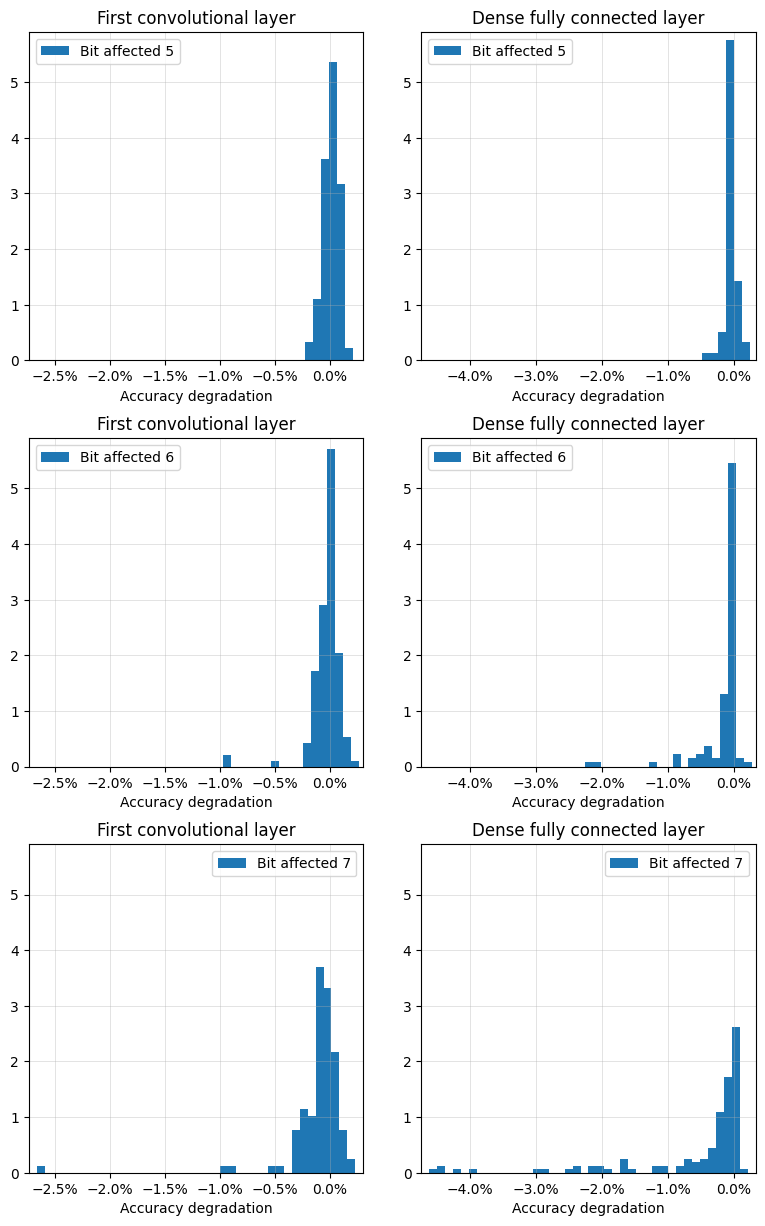

In [4]:
# Accuracy degradation histogram for the Q Aware model
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())
SAVE_NAME = 'Q_Aware_accuracy_degradation_histogram.' + EXTENSION

# Data Ranges
bits_range = range(5, 8)
layers_list = [0, 3]
titles_list = ['First convolutional layer', 'Dense fully connected layer']

# Figure dpi = 100.0 default dots per inch, figsize is in inches
ax : List[List[plt.Axes]]
fig, ax = plt.subplots(len(bits_range), len(layers_list), figsize = (fig_size, 3/2*fig_size))
fig.tight_layout(h_pad = 3.5, rect=[0, 0, 1, 1]) # w_pad for horizontal padding
# fig.suptitle('Q Aware accuracy degradation histogram shared axis with 1 bit affected')

list_xmax = []
list_xmin = []
list_ymax = []
for column, layer in enumerate(layers_list):
    condition = (df['kernel_index'] == layer) & (df['bit_disrupted'].isin(bits_range))
    list_xmax.append(df.loc[condition]['q_aware_acc_degradation'].max())
    list_xmin.append(df.loc[condition]['q_aware_acc_degradation'].min())

bin_grid_number = 40
for row, bit in enumerate(bits_range):
    for column, layer in enumerate(layers_list):
        ax[row,column].xaxis.set_major_formatter(ticker.PercentFormatter(decimals = 1))
        condition = (df['kernel_index'].notna()) & (df['kernel_index'] == layer) & (df['bit_disrupted'] == bit)
        data = df.loc[condition]['q_aware_acc_degradation']*100
        binwidth = (list_xmax[column] - list_xmin[column])*100/bin_grid_number
        [values, bins, patches] = ax[row,column].hist(data, bins = np.arange(min(data), max(data) + binwidth, binwidth), density = True)
        list_ymax.append(values.max())
        ax[row,column].set_xlabel('Accuracy degradation')
        ax[row,column].grid()
        ax[row,column].grid(which = 'major', linestyle = '-', alpha = 0.50, linewidth = 0.5)
        ax[row,column].legend(['Bit affected ' + str(bit)])
        ax[row,column].set_title(titles_list[column])
        ax[row,column].set_xlim([list_xmin[column]*100 - binwidth, list_xmax[column]*100 + binwidth])

for row, bit in enumerate(bits_range):
    for column, layer in enumerate(layers_list):
        ax[row,column].set_ylim([0, 1.025*np.max(list_ymax)])

plt.savefig(save_path + SAVE_NAME, bbox_inches = 'tight')
plt.show()
plt.close()

NameError: name 'SAVE_PATH' is not defined

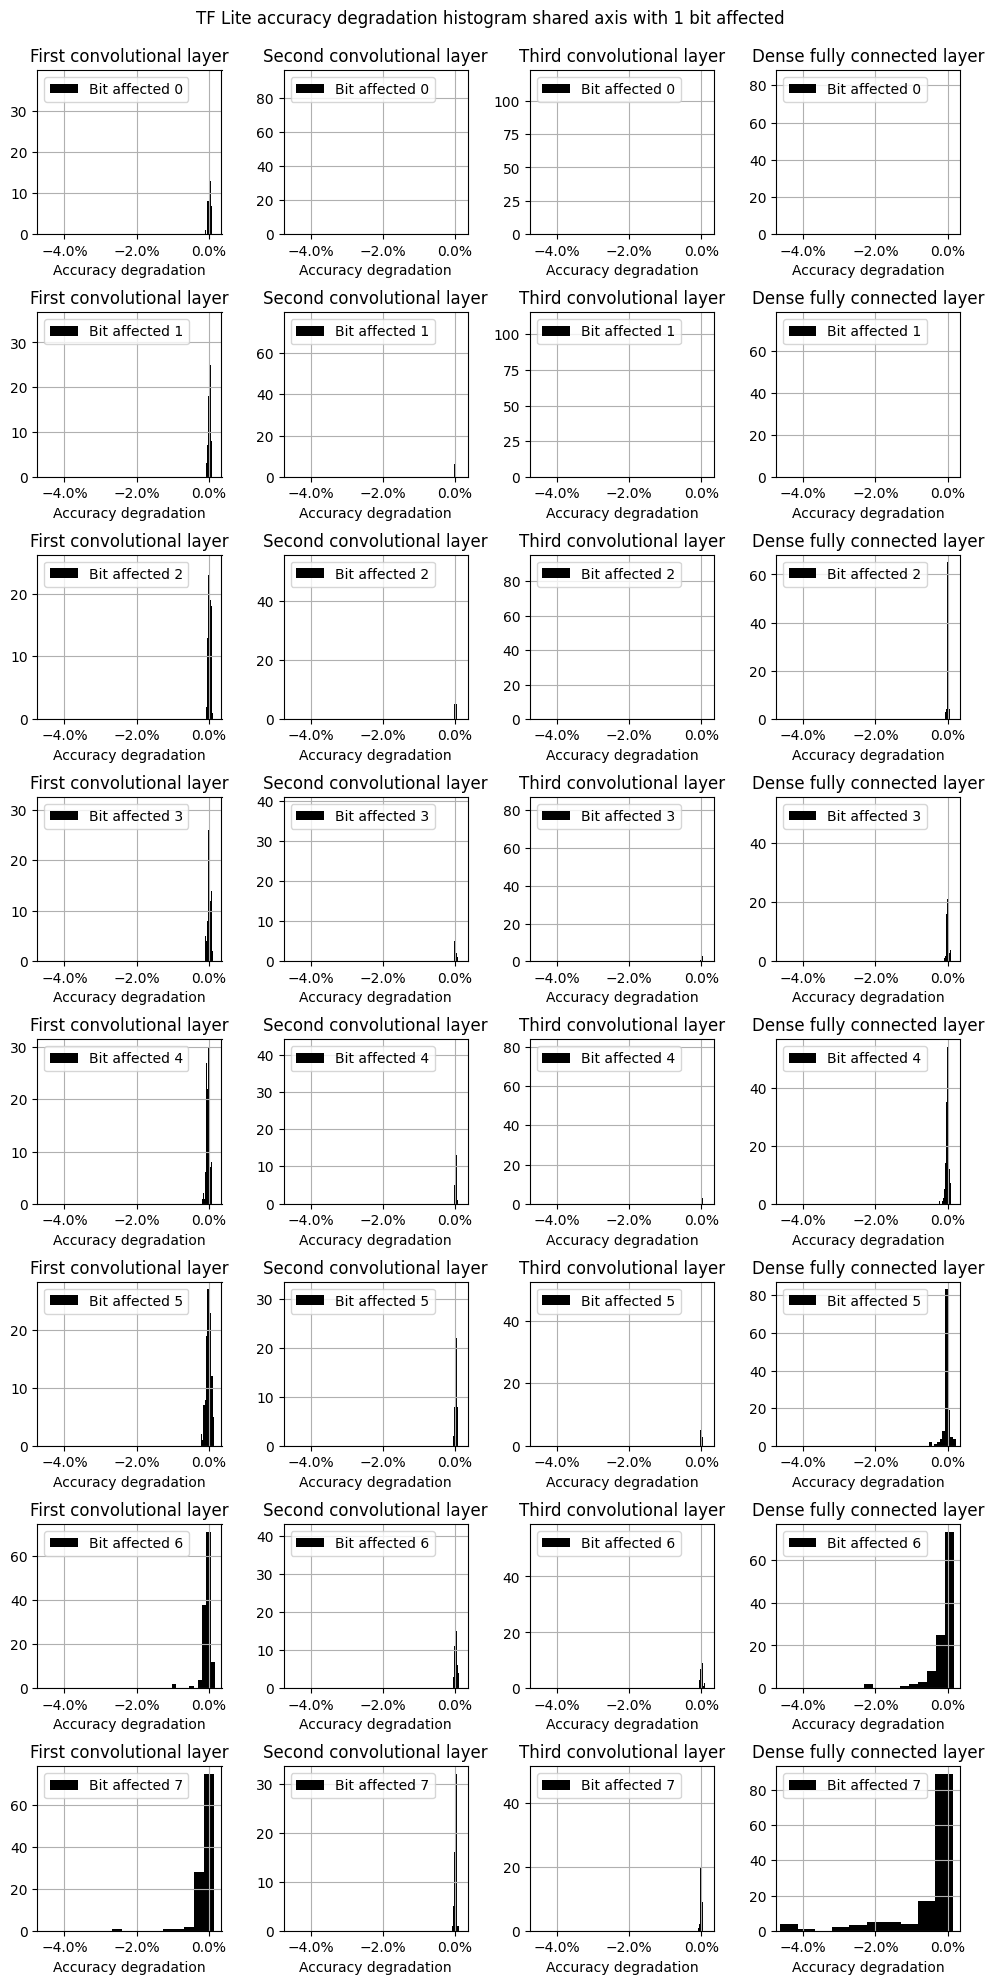

In [40]:
# TFLite accuracy degradation histogram? delete later
EXTENSION = 'png'
[save_path, fig_size] = pyplot_backend_change(EXTENSION)
print("Matploblib backend:", matplotlib.get_backend())

ax : List[List[plt.Axes]]
N_BITS = 8
N_LAYERS = 4
fig, ax = plt.subplots(N_BITS, N_LAYERS, figsize = (10, 20))
fig.tight_layout(h_pad = 3.5, rect=[0, 0, 1, 0.96])
fig.suptitle('TF Lite accuracy degradation histogram shared axis with 1 bit affected')

for row in range(N_BITS):
    for column in range(N_LAYERS):
        ax[row,column].xaxis.set_major_formatter(ticker.PercentFormatter())
        ax[row,column].hist(df.loc[(df['kernel_index'] == column) & (df['bit_disrupted'] == row)]['tflite_acc_degradation']*100, color = 'k')
        ax[row,column].set_xlabel('Accuracy degradation')
        ax[row,column].grid()
        ax[row,column].legend(['Bit affected ' + str(row)])
        match column:
            case 0:
                ax[row,column].set_title('First convolutional layer')
                ax[row,column].set_xlim([-4.75, 0.35])
                # ax[row,column].set_xlim([-2.95, 0.25])
            case 1:
                ax[row,column].set_title('Second convolutional layer')
                ax[row,column].set_xlim([-4.75, 0.35])
                # ax[row,column].set_xlim([-0.085, 0.125])
            case 2:
                ax[row,column].set_title('Third convolutional layer')
                ax[row,column].set_xlim([-4.75, 0.35])
                # ax[row,column].set_xlim([-0.095, 0.09])
            case 3:
                ax[row,column].set_title('Dense fully connected layer')
                ax[row,column].set_xlim([-4.75, 0.35])
                # ax[row,column].set_xlim([-4.75, 0.35])
            case _:
                print("Error no such column found")

plt.savefig(save_path + 'TFLite degradation histogram shared axis.png', bbox_inches = 'tight')
plt.show()
plt.close()